<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/4m_kr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

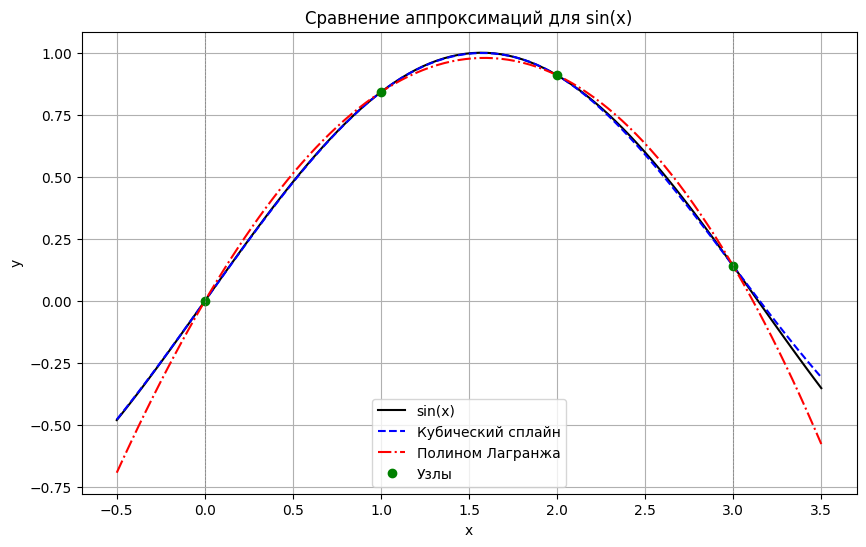

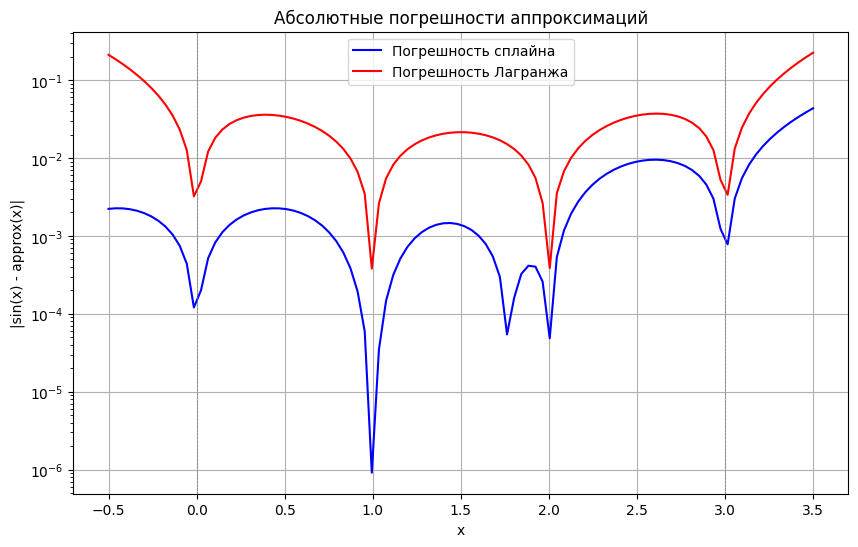

In [2]:
from math import sin
import numpy as np
from scipy.interpolate import CubicSpline, lagrange
import matplotlib.pyplot as plt

# Узлы и значения
x_nodes = np.array([0.0, 1.0, 2.0, 3.0])
y_nodes = np.sin(x_nodes)

# Кубический сплайн (натуральный)
spline = CubicSpline(x_nodes, y_nodes, bc_type='natural')

# Полином Лагранжа
lag_poly = lagrange(x_nodes, y_nodes)

# Точки для оценки
x_dense = np.linspace(-0.5, 3.5, 100)
y_true_dense = np.sin(x_dense)
y_spline_dense = spline(x_dense)
y_lag_dense = lag_poly(x_dense)

# График аппроксимаций
plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_true_dense, 'k-', label='sin(x)')
plt.plot(x_dense, y_spline_dense, 'b--', label='Кубический сплайн')
plt.plot(x_dense, y_lag_dense, 'r-.', label='Полином Лагранжа')
plt.plot(x_nodes, y_nodes, 'go', label='Узлы')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=3, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Сравнение аппроксимаций для sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# График погрешностей
error_spline_dense = np.abs(y_true_dense - y_spline_dense)
error_lag_dense = np.abs(y_true_dense - y_lag_dense)

plt.figure(figsize=(10, 6))
plt.plot(x_dense, error_spline_dense, 'b-', label='Погрешность сплайна')
plt.plot(x_dense, error_lag_dense, 'r-', label='Погрешность Лагранжа')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=3, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Абсолютные погрешности аппроксимаций')
plt.xlabel('x')
plt.ylabel('|sin(x) - approx(x)|')
plt.yscale('log')  # Логарифмическая шкала для лучшей видимости
plt.grid(True)
plt.show()

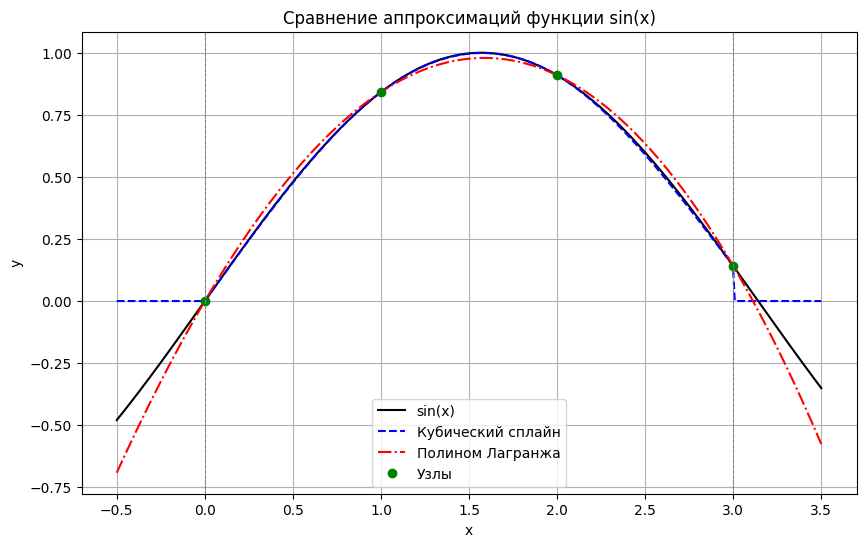

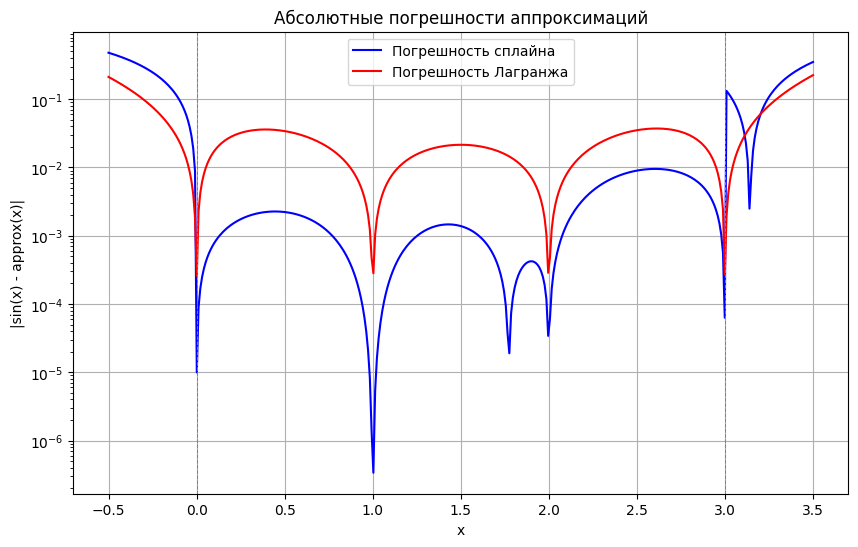

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin


#Исходная функция
def f(x):
    return np.sin(x)

x_nodes = np.array([0.0, 1.0, 2.0, 3.0])
y_nodes = f(x_nodes)

n = len(x_nodes) - 1
h = x_nodes[1] - x_nodes[0]

# 2. Построение кубического сплайна
# (естественный сплайн)

# Вектор вторых производных M_i
M = np.zeros(n + 1)

# Система для внутренних узлов
A = np.zeros((n - 1, n - 1))
rhs = np.zeros(n - 1)

for i in range(n - 1):
    A[i, i] = 4
    if i > 0:
        A[i, i - 1] = 1
    if i < n - 2:
        A[i, i + 1] = 1

    rhs[i] = (6 / h**2) * (y_nodes[i + 2] - 2 * y_nodes[i + 1] + y_nodes[i])

# Решение системы
M[1:n] = np.linalg.solve(A, rhs)
# M[0] = M[n] = 0 — естественные граничные условия

#коэффициенты сплайна

a = y_nodes[:-1]
b = np.zeros(n)
c = M[:-1] / 2
d = np.zeros(n)

for i in range(n):
    b[i] = (y_nodes[i + 1] - y_nodes[i]) / h - h * (2 * M[i] + M[i + 1]) / 6
    d[i] = (M[i + 1] - M[i]) / (6 * h)

# Функция вычисления сплайна
def cubic_spline(x):
    x = np.asarray(x)
    S = np.zeros_like(x)
    for i in range(n):
        mask = (x >= x_nodes[i]) & (x <= x_nodes[i + 1])
        dx = x[mask] - x_nodes[i]
        S[mask] = (
            a[i]
            + b[i] * dx
            + c[i] * dx**2
            + d[i] * dx**3
        )
    return S

# Полином Лагранжа 3степени

def lagrange_poly(x):
    x = np.asarray(x)
    L = np.zeros_like(x, dtype=float)
    for k in range(n + 1):
        term = np.ones_like(x)
        for j in range(n + 1):
            if j != k:
                term *= (x - x_nodes[j]) / (x_nodes[k] - x_nodes[j])
        L += y_nodes[k] * term
    return L


x_dense = np.linspace(-0.5, 3.5, 400)
y_true = f(x_dense)
y_spline = cubic_spline(x_dense)
y_lag = lagrange_poly(x_dense)

plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_true, 'k-', label='sin(x)')
plt.plot(x_dense, y_spline, 'b--', label='Кубический сплайн')
plt.plot(x_dense, y_lag, 'r-.', label='Полином Лагранжа')
plt.plot(x_nodes, y_nodes, 'go', label='Узлы')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(3, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.title('Сравнение аппроксимаций функции sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

error_spline = np.abs(y_true - y_spline)
error_lag = np.abs(y_true - y_lag)

plt.figure(figsize=(10, 6))
plt.plot(x_dense, error_spline, 'b-', label='Погрешность сплайна')
plt.plot(x_dense, error_lag, 'r-', label='Погрешность Лагранжа')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(3, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.title('Абсолютные погрешности аппроксимаций')
plt.xlabel('x')
plt.ylabel('|sin(x) - approx(x)|')
plt.yscale('log')
plt.grid(True)
plt.show()
